# Import Library :

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data and Preprocessing :

In [ ]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz

Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=0ca7e35f-14a5-4e4e-a191-b87914f7f55a
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 43.9MB/s]


In [ ]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Handle missing values (if any)
data = data.dropna()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Normalize the Amount Feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']

In [ ]:
features = features.drop(['Time'] , axis = 1)
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
# Chech how many classes are in Labels
labels.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Creating the Model :

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=64)

# Oversample the training data using SMOTE
smote = SMOTE(random_state=64)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [ ]:
print(y_train.value_counts())
y_train_resampled.value_counts()

Class
0    227464
1       381
Name: count, dtype: int64


Class
0    227464
1    227464
Name: count, dtype: int64

## Autoencoder :

In [ ]:
# Denoising Autoencoder
dae = Sequential([
    GaussianNoise(0.1, input_shape=(X_train_resampled.shape[1],)),
    Dense(29, activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(22, activation='relu'),
    Dense(29, activation='relu')
])
dae.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the DAE
dae.fit(X_train_resampled, X_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
])

# Get the denoised output
X_train_denoised = dae.predict(X_train_resampled)

Epoch 1/100
1422/1422 [==============================] - 11s 6ms/step - loss: 9.0559 - val_loss: 21.8428
Epoch 2/100
1422/1422 [==============================] - 7s 5ms/step - loss: 8.7526 - val_loss: 21.7988
Epoch 3/100
1422/1422 [==============================] - 5s 3ms/step - loss: 8.7147 - val_loss: 21.7815
Epoch 4/100
1422/1422 [==============================] - 6s 4ms/step - loss: 8.7004 - val_loss: 21.7731
Epoch 5/100
1422/1422 [==============================] - 6s 5ms/step - loss: 8.6882 - val_loss: 21.7497
Epoch 6/100
1422/1422 [==============================] - 8s 5ms/step - loss: 8.6789 - val_loss: 21.7440
Epoch 7/100
1422/1422 [==============================] - 7s 5ms/step - loss: 8.6741 - val_loss: 21.7410
Epoch 8/100
1422/1422 [==============================] - 5s 3ms/step - loss: 8.6555 - val_loss: 21.6943
Epoch 9/100
1422/1422 [==============================] - 7s 5ms/step - loss: 8.6500 - val_loss: 21.6937
Epoch 10/100
1422/1422 [==============================] - 6s 4m

## Classification :

In [ ]:
# One-hot encode the labels for the classifier
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)


In [ ]:
# Classifier
classifier = Sequential([
    Dense(29, input_shape=(X_train_denoised.shape[1],), activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model checkpoints
checkpoint = ModelCheckpoint(filepath = 'best_model', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the classifier
history = classifier.fit(X_train_denoised, y_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])



Epoch 1/100
1422/1422 [==============================] - 7s 4ms/step - loss: 0.1782 - accuracy: 0.9607 - val_loss: 0.1498 - val_accuracy: 0.9877
Epoch 2/100
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0569 - accuracy: 0.9878 - val_loss: 0.0691 - val_accuracy: 0.9897
Epoch 3/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0355 - accuracy: 0.9907 - val_loss: 0.0360 - val_accuracy: 0.9941
Epoch 4/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.0247 - val_accuracy: 0.9954
Epoch 5/100
1422/1422 [==============================] - 5s 4ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.0232 - val_accuracy: 0.9943
Epoch 6/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0194 - val_accuracy: 0.9956
Epoch 7/100
1422/1422 [==============================] - 5s 4ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0185 - val_ac

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_model.h5')

# Iterate through the layers and display their weights
for layer in model.layers:
    print(f"Layer name: {layer.name}")
    print(f"Weights: {layer.get_weights()}")
    print("="*50)


Layer name: dense_7
Weights: [array([[-9.42704380e-02,  1.62669718e-01, -1.65084243e-01,
         1.80774331e-02,  1.53921872e-01,  2.37258315e-01,
         1.65405571e-02, -1.55690059e-01, -2.75933176e-01,
        -4.39924002e-03,  1.06409788e-02,  1.48512483e-01,
        -1.43338650e-01,  2.07825124e-01,  2.72892952e-01,
         2.83467770e-01,  2.32567072e-01,  1.64821446e-01,
         2.17733800e-01, -2.19267458e-01, -2.18951911e-01,
        -2.32956856e-01, -3.08528632e-01, -2.77606636e-01,
        -3.21088165e-01,  2.18297124e-01,  7.32584596e-02,
         2.55369961e-01,  4.12961841e-02],
       [-2.83319671e-02, -3.37777108e-01,  2.53846258e-01,
        -3.42739075e-02,  1.13988899e-01,  2.41632342e-01,
        -6.93751872e-01,  1.36313260e-01,  9.01308358e-02,
        -2.03595027e-01,  1.41132085e-04,  2.38262609e-01,
        -4.95752484e-01,  7.91410133e-02,  6.07245713e-02,
        -1.52580857e-01, -2.94639885e-01, -2.72245500e-02,
         2.41923481e-02,  2.63928413e-01, 

## Confusion matrix and Other metrics :

In [ ]:
# Get the denoised output
X_test_denoised = dae.predict(X_test)

1781/1781 [==============================] - 3s 1ms/step


1781/1781 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56851
           1       0.14      0.85      0.24       111

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.62     56962
weighted avg       1.00      0.99      0.99     56962

Precision: 0.14114114114114115
Recall: 0.8468468468468469
F1 Score: 0.24195624195624196


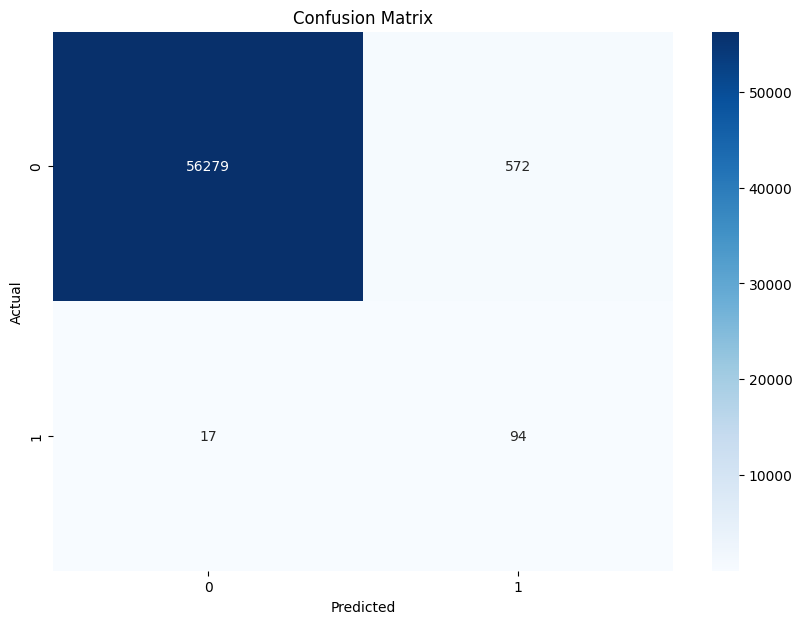

In [ ]:
# Evaluate the model on the test set
y_pred_proba = classifier.predict(X_test_denoised)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print( accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Different threshold :

## Threshold for Prediction :

In [17]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
data = data.dropna()

# Normalize only the "Amount" feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']

features = features.drop(['Time'] , axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=64)

smote = SMOTE( random_state=64)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Store results
#ratios = [0.2, 0.3, 0.4, 0.5 , .6]
#recall_scores = []
#accuracy_scores = []


    # Denoising Autoencoder
dae = Sequential([
     GaussianNoise(0.1, input_shape=(X_train_resampled.shape[1],)),
    Dense(29, activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(22, activation='relu'),
     Dense(29, activation='relu')
])
dae.compile(optimizer='adam', loss='mse')

    # Train the DAE
dae.fit(X_train_resampled, X_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
])

    # Get the denoised output
X_train_denoised = dae.predict(X_train_resampled)
X_test_denoised = dae.predict(X_test)

    # One-hot encode the labels for the classifier
y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

    # Classifier
classifier = Sequential([
    Dense(29, input_shape=(X_train_denoised.shape[1],), activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
    ])
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Model checkpoints
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

    # Train the classifier
classifier.fit(X_train_denoised, y_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])



Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=3c40725b-e41b-4a17-b641-0b9760344957
To: /content/creditcard.csv
100% 151M/151M [00:02<00:00, 55.0MB/s]
Epoch 1/100
1422/1422 [==============================] - 9s 5ms/step - loss: 8.9470 - val_loss: 21.8957
Epoch 2/100
1422/1422 [==============================] - 10s 7ms/step - loss: 8.7207 - val_loss: 21.7862
Epoch 3/100
1422/1422 [==============================] - 6s 4ms/step - loss: 8.6863 - val_loss: 21.7721
Epoch 4/100
1422/1422 [==============================] - 7s 5ms/step - loss: 8.6688 - val_loss: 21.7647
Epoch 5/100
1422/1422 [==============================] - 6s 5ms/step - loss: 8.6559 - val_loss: 21.7524
Epoch 6/100
1422/1422 [==============================] - 6s 4ms/step - loss: 8.6476 - val_loss: 21.7493
Epoch 7/100
1422/1422 [==============================] - 7s 5ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1422/1422 [==============================] - 6s 4ms/step - loss: 0.0323 - accuracy: 0.9886 - val_loss: 0.0454 - val_accuracy: 0.9831
Epoch 3/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0241 - val_accuracy: 0.9935
Epoch 4/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0127 - val_accuracy: 0.9971
Epoch 5/100
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 6/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0102 - val_accuracy: 0.9979
Epoch 7/100
1422/1422 [==============================] - 6s 4ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0062 - val_accuracy: 0.9989
Epoch 8/100
1422/1422 [==============================] - 7s 5ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0101 - val_accuracy: 0.99

1781/1781 [==============================] - 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


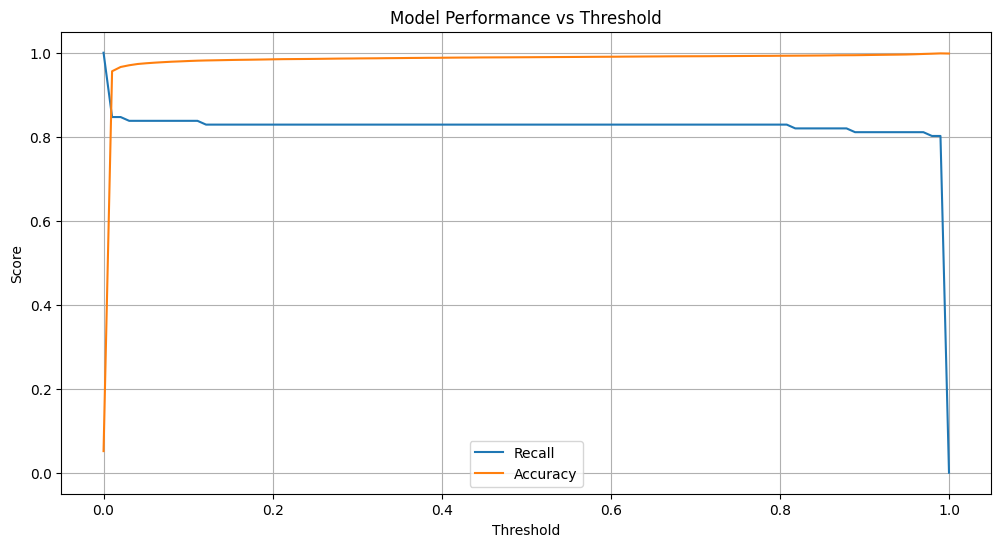

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

# Define a function to calculate metrics at different thresholds
def evaluate_thresholds(model, X_test, y_test, thresholds):
    recall_scores = []
    accuracy_scores = []
    precision_scores = []
    f1_scores = []

    y_pred_proba = model.predict(X_test_denoised)

    for threshold in thresholds:
        y_pred = (y_pred_proba[:, 1] > threshold).astype(int)  # Get binary predictions for the positive class
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        f1_scores.append(f1)

    return recall_scores, accuracy_scores, precision_scores, f1_scores

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Assuming the classifier model is already trained and available as 'classifier'
recall_scores, accuracy_scores, precision_scores, f1_scores = evaluate_thresholds(classifier, X_test_denoised, y_test, thresholds)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


## Threshold For oversampling :

Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=61c3d0fc-edf5-4a85-8f6e-dd4ab18a1c3e
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 88.4MB/s]
Epoch 1/100
853/853 [==============================] - 6s 5ms/step - loss: 0.8842 - val_loss: 20.7044
Epoch 2/100
853/853 [==============================] - 7s 9ms/step - loss: 0.7881 - val_loss: 20.5741
Epoch 3/100
853/853 [==============================] - 4s 5ms/step - loss: 0.7690 - val_loss: 20.3237
Epoch 4/100
853/853 [==============================] - 4s 4ms/step - loss: 0.7607 - val_loss: 20.2237
Epoch 5/100
853/853 [==============================] - 5s 6ms/step - loss: 0.7553 - val_loss: 20.2200
Epoch 6/100
853/853 [==============================] - 5s 5ms/step - loss: 0.7528 - val_loss: 20.1826
Epoch 7/100
853/853 [==============================] - 4s 4ms/step - loss: 0.7496 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


853/853 [==============================] - 4s 5ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 1.1190 - val_accuracy: 0.7781
Epoch 3/100
853/853 [==============================] - 4s 4ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 1.0298 - val_accuracy: 0.8111
Epoch 4/100
853/853 [==============================] - 5s 6ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 1.1280 - val_accuracy: 0.7829
Epoch 5/100
853/853 [==============================] - 4s 4ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 1.0051 - val_accuracy: 0.8158
Epoch 6/100
853/853 [==============================] - 4s 4ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 1.2030 - val_accuracy: 0.7953
Epoch 7/100
853/853 [==============================] - 4s 5ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.8705 - val_accuracy: 0.8312
Epoch 8/100
853/853 [==============================] - 5s 6ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 1.1771 - val_accuracy: 0.7615
Epoch 9/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


925/925 [==============================] - 4s 4ms/step - loss: 0.0267 - accuracy: 0.9930 - val_loss: 0.3927 - val_accuracy: 0.8642
Epoch 3/100
925/925 [==============================] - 4s 4ms/step - loss: 0.0232 - accuracy: 0.9934 - val_loss: 0.3782 - val_accuracy: 0.8713
Epoch 4/100
925/925 [==============================] - 6s 6ms/step - loss: 0.0207 - accuracy: 0.9940 - val_loss: 0.3263 - val_accuracy: 0.8840
Epoch 5/100
925/925 [==============================] - 4s 4ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.2527 - val_accuracy: 0.9122
Epoch 6/100
925/925 [==============================] - 4s 4ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.2714 - val_accuracy: 0.9015
Epoch 7/100
925/925 [==============================] - 4s 4ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 0.1911 - val_accuracy: 0.9314
Epoch 8/100
925/925 [==============================] - 5s 6ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.2538 - val_accuracy: 0.9109
Epoch 9/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


996/996 [==============================] - 5s 5ms/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.1963 - val_accuracy: 0.9232
Epoch 3/100
996/996 [==============================] - 4s 4ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0944 - val_accuracy: 0.9736
Epoch 4/100
996/996 [==============================] - 4s 4ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.1207 - val_accuracy: 0.9614
Epoch 5/100
996/996 [==============================] - 6s 6ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.1069 - val_accuracy: 0.9652
Epoch 6/100
996/996 [==============================] - 4s 4ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0866 - val_accuracy: 0.9705
Epoch 7/100
996/996 [==============================] - 4s 4ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0728 - val_accuracy: 0.9765
Epoch 8/100
996/996 [==============================] - 6s 6ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.0554 - val_accuracy: 0.9832
Epoch 9/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1067/1067 [==============================] - 5s 5ms/step - loss: 0.0466 - accuracy: 0.9817 - val_loss: 0.1070 - val_accuracy: 0.9549
Epoch 3/100
1067/1067 [==============================] - 4s 4ms/step - loss: 0.0366 - accuracy: 0.9860 - val_loss: 0.1110 - val_accuracy: 0.9585
Epoch 4/100
1067/1067 [==============================] - 4s 4ms/step - loss: 0.0316 - accuracy: 0.9881 - val_loss: 0.1025 - val_accuracy: 0.9572
Epoch 5/100
1067/1067 [==============================] - 7s 6ms/step - loss: 0.0279 - accuracy: 0.9895 - val_loss: 0.0982 - val_accuracy: 0.9620
Epoch 6/100
1067/1067 [==============================] - 4s 4ms/step - loss: 0.0259 - accuracy: 0.9903 - val_loss: 0.0713 - val_accuracy: 0.9735
Epoch 7/100
1067/1067 [==============================] - 5s 5ms/step - loss: 0.0245 - accuracy: 0.9908 - val_loss: 0.0688 - val_accuracy: 0.9761
Epoch 8/100
1067/1067 [==============================] - 5s 5ms/step - loss: 0.0232 - accuracy: 0.9913 - val_loss: 0.1117 - val_accuracy: 0.95

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1138/1138 [==============================] - 4s 4ms/step - loss: 0.0444 - accuracy: 0.9827 - val_loss: 0.0816 - val_accuracy: 0.9696
Epoch 3/100
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0303 - accuracy: 0.9891 - val_loss: 0.0557 - val_accuracy: 0.9827
Epoch 4/100
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0253 - accuracy: 0.9910 - val_loss: 0.1436 - val_accuracy: 0.9412
Epoch 5/100
1138/1138 [==============================] - 4s 4ms/step - loss: 0.0225 - accuracy: 0.9922 - val_loss: 0.0449 - val_accuracy: 0.9859
Epoch 6/100
1138/1138 [==============================] - 6s 5ms/step - loss: 0.0211 - accuracy: 0.9925 - val_loss: 0.0447 - val_accuracy: 0.9852
Epoch 7/100
1138/1138 [==============================] - 5s 4ms/step - loss: 0.0189 - accuracy: 0.9934 - val_loss: 0.0260 - val_accuracy: 0.9930
Epoch 8/100
1138/1138 [==============================] - 4s 4ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0235 - val_accuracy: 0.99

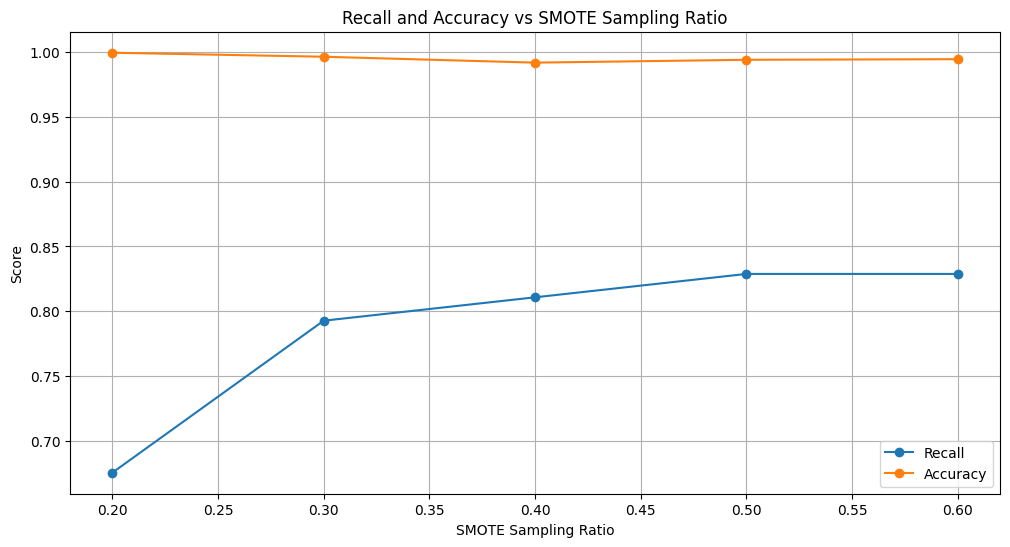

In [19]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
data = data.dropna()

# Normalize only the "Amount" feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']

features = features.drop(['Time'] , axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=64)


# Store results
ratios = [0.2, 0.3, 0.4, 0.5 , .6]
recall_scores = []
accuracy_scores = []

for ratio in ratios:
    # Apply SMOTE with different ratios
    smote = SMOTE(sampling_strategy=ratio, random_state=64)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


    # Denoising Autoencoder
    dae = Sequential([
        GaussianNoise(0.1, input_shape=(X_train_resampled.shape[1],)),
        Dense(29, activation='relu'),
        Dense(22, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(15, activation='relu'),
        Dense(22, activation='relu'),
        Dense(29, activation='relu')
])
    dae.compile(optimizer='adam', loss='mse')

    # Train the DAE
    dae.fit(X_train_resampled, X_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
])

    # Get the denoised output
    X_train_denoised = dae.predict(X_train_resampled)
    X_test_denoised = dae.predict(X_test)

    # One-hot encode the labels for the classifier
    y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

    # Classifier
    classifier = Sequential([
        Dense(29, input_shape=(X_train_denoised.shape[1],), activation='relu'),
        Dense(22, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(2, activation='softmax')
    ])
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Model checkpoints
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_resampled, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])


    # Evaluate the model on the test set
    y_pred_proba = classifier.predict(X_test_denoised)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    recall_scores.append(recall)
    accuracy_scores.append(accuracy)

# Plot Recall and Accuracy
plt.figure(figsize=(12, 6))
plt.plot(ratios, recall_scores, label='Recall', marker='o')
plt.plot(ratios, accuracy_scores, label='Accuracy', marker='o')
plt.xlabel('SMOTE Sampling Ratio')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs SMOTE Sampling Ratio')
plt.legend()
plt.grid(True)
plt.show()


# Classification without Oversampling and denoising :

In [3]:
!gdown 124_jH5kuOfoVdfFpV9qav4kVXYcuoliz

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
data = data.dropna()

# Normalize only the "Amount" feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features and labels
features = data.drop(['Class'], axis=1)
labels = data['Class']

features = features.drop(['Time'] , axis = 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=64)




    # One-hot encode the labels for the classifier
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Classifier
classifier = Sequential([
    Dense(29, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(22, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model checkpoints
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the classifier
history = classifier.fit(X_train,y_train_one_hot, epochs=100, batch_size=256, validation_split=0.2, callbacks=[checkpoint, early_stopping])




Downloading...
From (original): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz
From (redirected): https://drive.google.com/uc?id=124_jH5kuOfoVdfFpV9qav4kVXYcuoliz&confirm=t&uuid=60e6befa-57e3-42f9-9c23-3afa256b7e9d
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 50.0MB/s]
Epoch 1/100
713/713 [==============================] - 4s 4ms/step - loss: 0.0237 - accuracy: 0.9990 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/100
 37/713 [>.............................] - ETA: 1s - loss: 0.0049 - accuracy: 0.9992

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


713/713 [==============================] - 2s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 3/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 4/100
713/713 [==============================] - 4s 6ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 5/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 6/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 7/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 8/100
713/713 [==============================] - 3s 4ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 9/100

1781/1781 [==============================] - 5s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


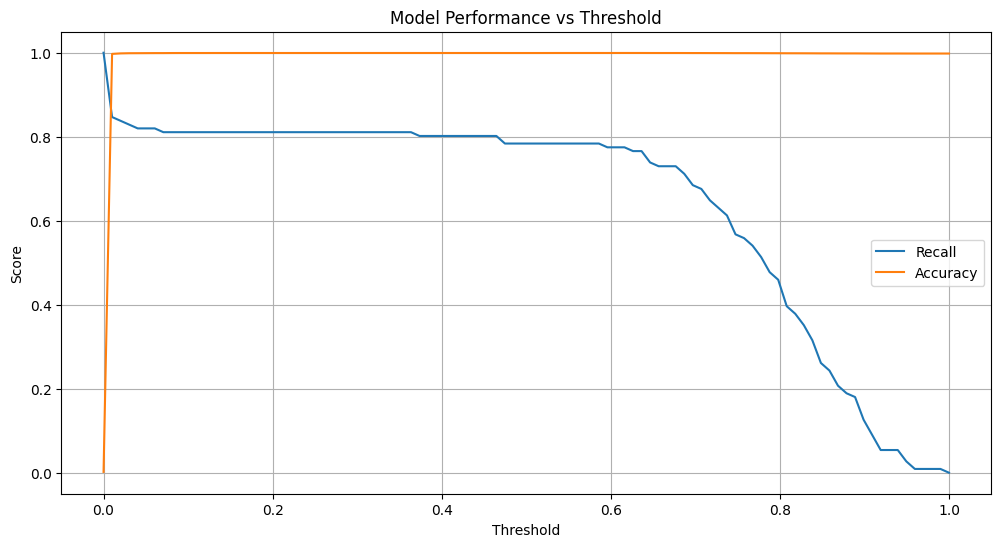

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

# Define a function to calculate metrics at different thresholds
def evaluate_thresholds(model, X_test, y_test, thresholds):
    recall_scores = []
    accuracy_scores = []
    precision_scores = []
    f1_scores = []

    y_pred_proba = model.predict(X_test)

    for threshold in thresholds:
        y_pred = (y_pred_proba[:, 1] > threshold).astype(int)  # Get binary predictions for the positive class
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        f1_scores.append(f1)

    return recall_scores, accuracy_scores, precision_scores, f1_scores

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Assuming the classifier model is already trained and available as 'classifier'
recall_scores, accuracy_scores, precision_scores, f1_scores = evaluate_thresholds(classifier, X_test, y_test, thresholds)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance vs Threshold')
plt.legend()
plt.grid(True)
plt.show()
